### hma data selection from global dataset

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union


#### 1. Select the hma lakes from global dataset by location.


In [7]:
path_hma = 'data/extents/HMA/gtng_202307_hma_subregions.gpkg'
path_lakes = 'data/lakes/HydroLakes_v10_region.gpkg' 
path_lakes_hma = 'data/lakes/HydroLakes_v10_hma.gpkg' 

In [8]:
## Read data
lakes_gpd = gpd.read_file(path_lakes)
hma_gpd = gpd.read_file(path_hma)
print(lakes_gpd.shape)
lakes_gpd.head()


(7912, 22)


Hylak_id                    Lake_name     Country Continent Poly_src  \
0        12                     Balkhash  Kazakhstan      Asia     SWBD   
1       131                       Alakol  Kazakhstan      Asia     SWBD   
2       135  Qapshaghay Bogeni Reservoir  Kazakhstan      Asia     SWBD   
3       136                    Issyk Kul  Kyrgyzstan      Asia     SWBD   
4       138                        Aydar  Uzbekistan      Asia     SWBD   

   Lake_type  Grand_id  Lake_area  Shore_len  Shore_dev  ...  Vol_src  \
0          1         0   16717.89    3092.20       6.75  ...        1   
1          1         0    2919.34     567.40       2.96  ...        1   
2          2      4789    1205.95     297.84       2.42  ...        2   
3          1         0    6195.93     608.84       2.18  ...        1   
4          1         0    2742.41    2903.20      15.64  ...        1   

   Depth_avg  Dis_avg  Res_time  Elevation  Slope_100  Wshd_area  Pour_long  \
0        6.7  470.083    2745.3        338       -1.0   404800.5  74.602083   
1       22.1   55.947   13347.0        347       -1.0    63248.1  81.672917   
2       23.3  197.454    1647.1        475       -1.0   113657.6  77.103595   
3      280.5   72.678  276778.9       1601       -1.0    21917.0  77.427083   
4       16.2    0.000      -1.0        241       -1.0    20310.3  67.796971   

    Pour_lat                                           geometry  
0  46.385417  MULTIPOLYGON (((74.98387 46.83114, 74.98618 46...  
1  46.152083  MULTIPOLYGON (((81.54844 46.50765, 81.55058 46...  
2  43.921730  MULTIPOLYGON (((77.36484 43.93924, 77.36750 43...  
3  42.485417  MULTIPOLYGON (((78.21662 42.74460, 78.21667 42...  
4  40.868651  MULTIPOLYGON (((66.58917 40.86555, 66.58626 40...  

[5 rows x 22 columns]

In [23]:
## select the lakes in the hma region
poly_hma = unary_union(hma_gpd['geometry'])
lakes_id = np.where(poly_hma.contains(lakes_gpd['geometry'].centroid) == True)[0]
lakes_hma = lakes_gpd.iloc[lakes_id] 


<Axes: >

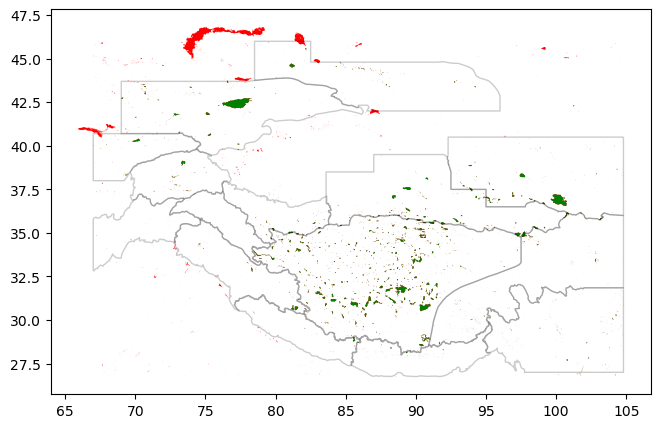

In [25]:
### Visualization
fig, ax = plt.subplots(1,1, figsize=(8,5))
lakes_gpd.plot(color='red', ax=ax)
lakes_hma.plot(color='green', ax=ax)
hma_gpd.plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.2)


In [ ]:
# ### Write out
# lakes_hma.to_file(path_lakes_hma, driver='GPKG')


#### 1. Select the hma lakes whose area are larger than a specific value.


In [26]:
path_lakes_hma = 'data/lakes/HydroLakes_v10_hma.gpkg' 
path_lakes_hma_larger1 = 'data/lakes/HydroLakes_v10_hma_larger1.gpkg' 


In [28]:
lakes_hma = gpd.read_file(path_lakes_hma)
lakes_hma.head()


Hylak_id  Lake_name     Country Continent Poly_src  Lake_type  Grand_id  \
0       136  Issyk Kul  Kyrgyzstan      Asia     SWBD          1         0   
1       143    Qinghai       China      Asia     SWBD          1         0   
2       147     Siling       China      Asia     SWBD          1         0   
3       149        Nam       China      Asia     SWBD          1         0   
4      1295  Sai li-mu       China      Asia     SWBD          1         0   

   Lake_area  Shore_len  Shore_dev  ...  Vol_src  Depth_avg  Dis_avg  \
0    6195.93     608.84       2.18  ...        1      280.5   72.678   
1    4266.55     434.23       1.88  ...        1       16.8   28.133   
2    1749.53     402.54       2.71  ...        1       28.0    0.000   
3    1963.82     367.56       2.34  ...        1       44.4   19.500   
4     460.42      90.55       1.19  ...        3       24.1    1.797   

   Res_time  Elevation  Slope_100  Wshd_area   Pour_long   Pour_lat  \
0  276778.9       1601      -1.00    21917.0   77.427083  42.485417   
1   29456.6       3194      -1.00    29604.7  100.197917  36.922917   
2      -1.0       4539      -1.00    29077.1   89.047917  31.777083   
3   51709.4       4724      -1.00    10741.3   90.656250  30.714583   
4   71528.6       2072       2.92     1328.7   81.160417  44.602083   

                                            geometry  
0  MULTIPOLYGON (((78.21662 42.74460, 78.21667 42...  
1  MULTIPOLYGON (((99.97966 37.23266, 99.98155 37...  
2  MULTIPOLYGON (((88.97853 32.01195, 88.98060 32...  
3  MULTIPOLYGON (((91.00826 30.78193, 91.00548 30...  
4  MULTIPOLYGON (((81.21348 44.68134, 81.21501 44...  

[5 rows x 22 columns]

In [33]:
### Select the glaciers which area larger than a specific value
lakes_hma_larger1 = lakes_hma.loc[lakes_hma['Lake_area'] > 5]


In [34]:
print(f'Number of the lakes: {lakes_hma.shape[0]}')
print(f'Area of the lakes: {lakes_hma.area.sum()}')
print(f'Number of the selected lakes: {lakes_hma_larger1.shape[0]}')
print(f'Area of the selected lakes: {lakes_hma_larger1.area.sum()}')


Number of the lakes: 5494
Area of the lakes: 5.053951337337987
Number of the selected lakes: 586
Area of the selected lakes: 4.762951636895022


In [35]:
# ### Write out
# lakes_hma_larger1.to_file(path_lakes_hma_larger1, driver='GPKG')
